In [ ]:
## This notebook is used to create difference plots for wind(troposphere) & temperature
## for case years (El Nino, not separated by type) compared to climatology

##Created by Kendra Herweck

In [1]:
import netCDF4 as nc
import numpy as np
import datetime as dt  # Python standard library datetime  module
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from astropy.table import Table
from astropy.io import ascii
from pandas import read_csv
from matplotlib.dates import DateFormatter
from pandas import DataFrame
from pandas import Grouper
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import xarray as xr
from glob import glob
from shapely.geometry.polygon import LinearRing
import h5py

## Wind Plots

### El Nino - Climatology

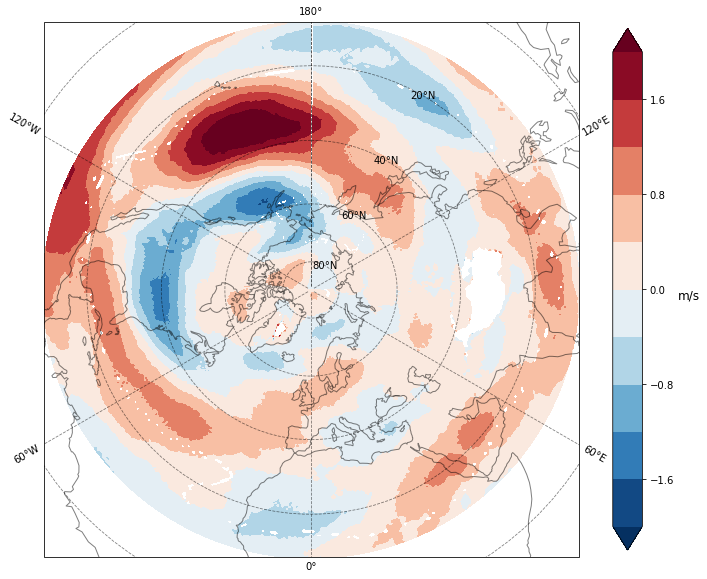

In [48]:
file1 = 'ElNinoYears-WindSpeed-10deg_detrended-data_700hPa.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'Climatological-WindSpeed_1980-2020_700hPa.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## el nino years
wind2=ds2['U'][0,:,:]  ## climatology
wind = wind1-wind2   ##el nino - clim


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-2, 2, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
#plt.title('Winter Eastward Wind Speed Difference (El Nino Years vs. Climatology 1980-2020),700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),col

### Low SIC - Climatology

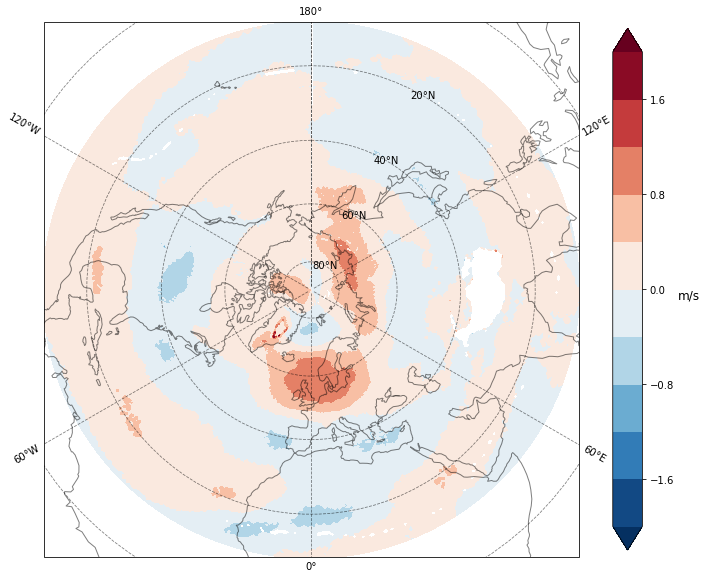

In [47]:
file1 = 'LowSICYears-WindSpeed-10deg_detrended-data_700hPa.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'Climatological-WindSpeed_1980-2020_700hPa.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic & el nino years
wind2=ds2['U'][0,:,:]  ## climatology
wind = wind1-wind2   ##low - high


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-2, 2, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
#plt.title('Winter Eastward Wind Speed Difference (Low SIC vs. Climatology 1980-2020),700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),col

### Low SIC & El Nino - Climatology

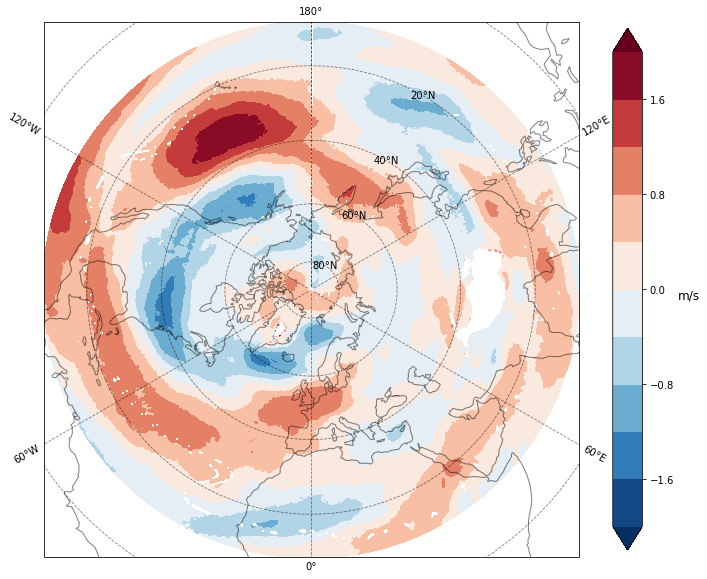

In [46]:
file1 = 'ElNino_LowSICYears-WindSpeed-10deg_detrended-data_700hPa.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'Climatological-WindSpeed_1980-2020_700hPa.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic & el nino years
wind2=ds2['U'][0,:,:]  ## climatology
wind = wind1-wind2   ##low - high


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-2, 2, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
#plt.title('Winter Eastward Wind Speed Difference (Low SIC & El Nino vs. Climatology 1980-2020),700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),col

### Low SIC - High SIC

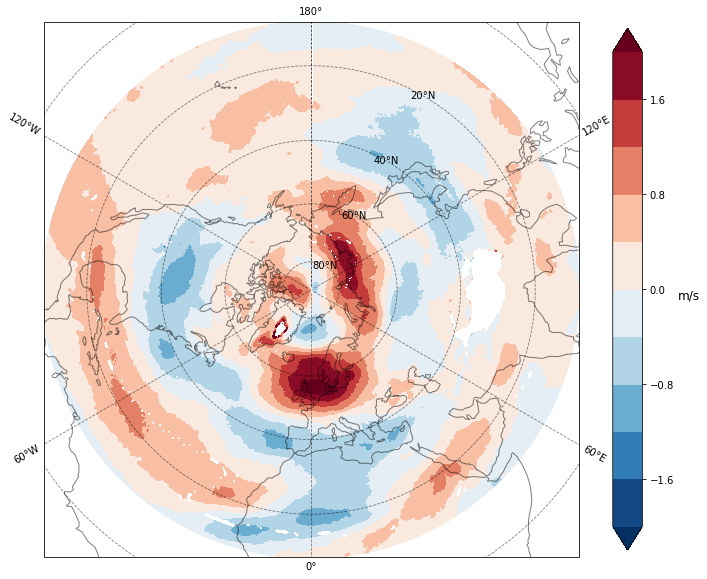

In [45]:
file1 = 'LowSICYears-WindSpeed-10deg_detrended-data_700hPa.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'HighSICYears-WindSpeed-10deg_detrended-data_700hPa.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic years
wind2=ds2['U'][:,:]  ## high sic years
wind = wind1-wind2   ##low - high
#climwind=ds3['U'][0,:]

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-2, 2, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
#plt.title('Winter Eastward Wind Speed Difference (Low SIC Years vs. High SIC Years),700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### Low SIC & El Nino - High SIC & El Nino

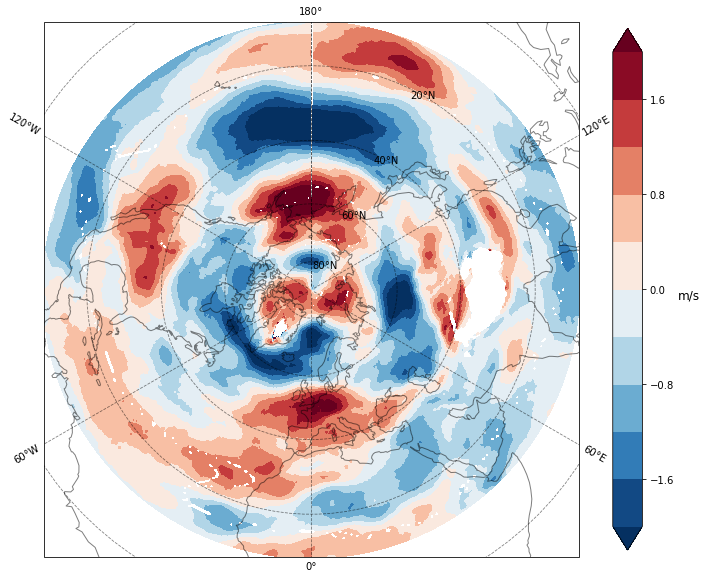

In [44]:
file1 = 'ElNino_LowSICYears-WindSpeed-10deg_detrended-data_700hPa.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'ElNino_HighSICYears-WindSpeed-10deg_detrended-data_700hPa.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic & el nino years
wind2=ds2['U'][:,:]  ## high sic & el nino years
wind = wind1-wind2   ##low - high


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-2, 2, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
#plt.title('Winter Eastward Wind Speed Difference (Low SIC & El Nino Years vs. High SIC & El Nino Years),700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## Temp Plots

### Low SIC - High SIC

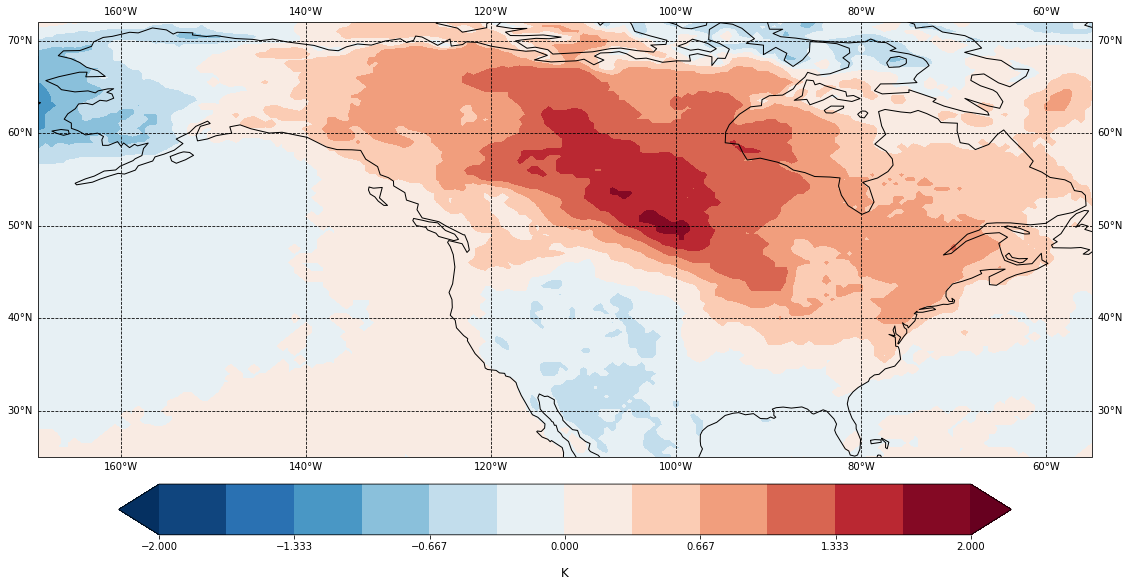

In [38]:
f = nc.Dataset('LowSICYears_Temp_detrended-data.nc', 'r')  #low sic years
f2=nc.Dataset('HighSICYears_Temp_detrended-data.nc','r')  #high sic years
lat= f.variables['lat']
lon=f.variables['lon']
t1=f.variables['T2M'][:,:]     ##low high
t2=f2.variables['T2M'][:,:]   ##high sic
temp=t1-t2


fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-2,2,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs. High SIC)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### Low SIC & El Nino - High SIC & El Nino

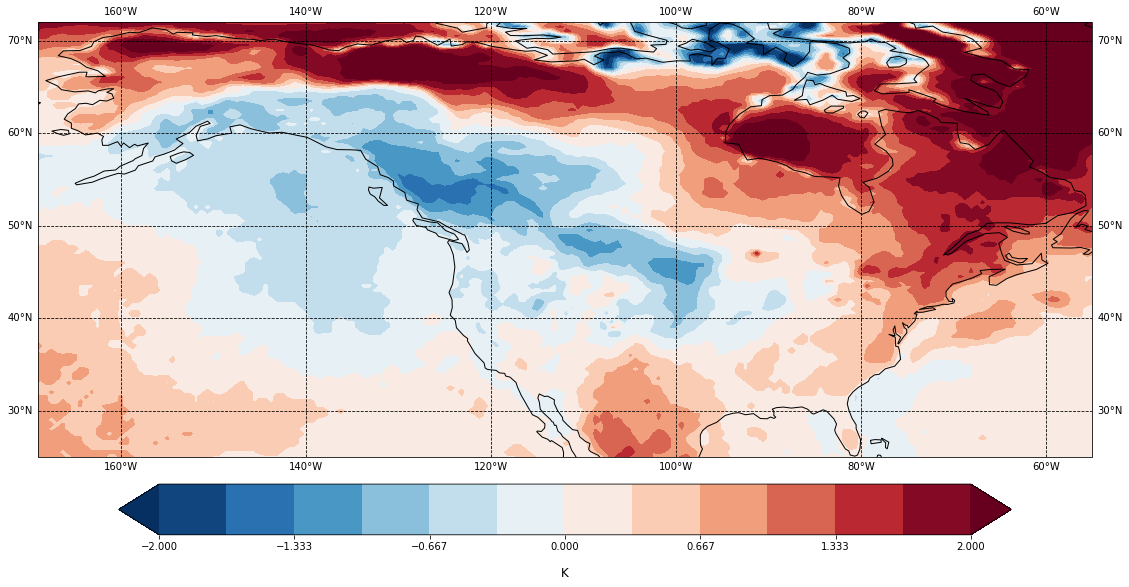

In [37]:
f = nc.Dataset('ElNino_LowSICYears_Temp_detrended-data.nc', 'r')  #low sic & el nino years
f2=nc.Dataset('ElNino_HighSICYears_Temp_detrended-data.nc','r')  #high sic & el nino years
lat= f.variables['lat']
lon=f.variables['lon']
t1=f.variables['T2M'][:,:]     ##low sic & el nino
t2=f2.variables['T2M'][:,:]   ##high sic & el nino
temp=t1-t2


fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-2,2,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC & El Nino vs. High SIC & El Nino)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### El Nino - Climatology

Text(0.5, 1.0, 'Average Winter Temperature Difference (El Nino  vs. Climatological Avg 1980-2020)')

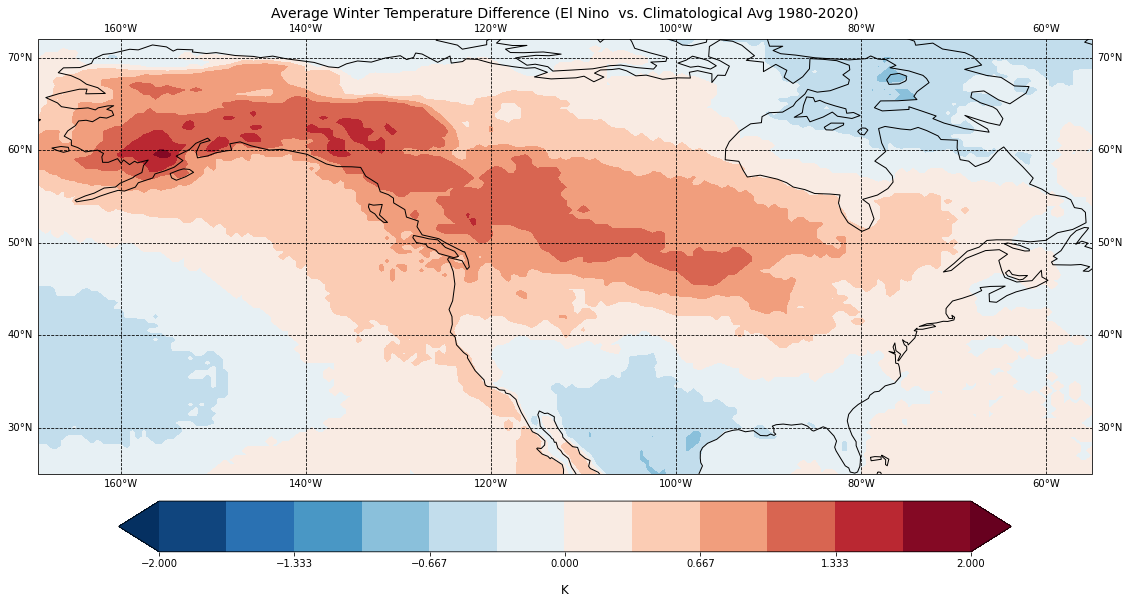

In [35]:
f = nc.Dataset('ElNinoYears_Temp_detrended-data.nc', 'r')  #low sic
f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #cliamtology
lat= f.variables['lat']
lon=f.variables['lon']
t1=f.variables['T2M'][:,:]     ##low sic 
t2=f2.variables['T2M'][:,:]   ##climatology
temp=t1-t2


fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-2,2,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
plt.title('Average Winter Temperature Difference (El Nino  vs. Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### Low SIC - Climatology

Text(0.5, 1.0, 'Average Winter Temperature Difference (Low SIC  vs. Climatological Avg 1980-2020)')

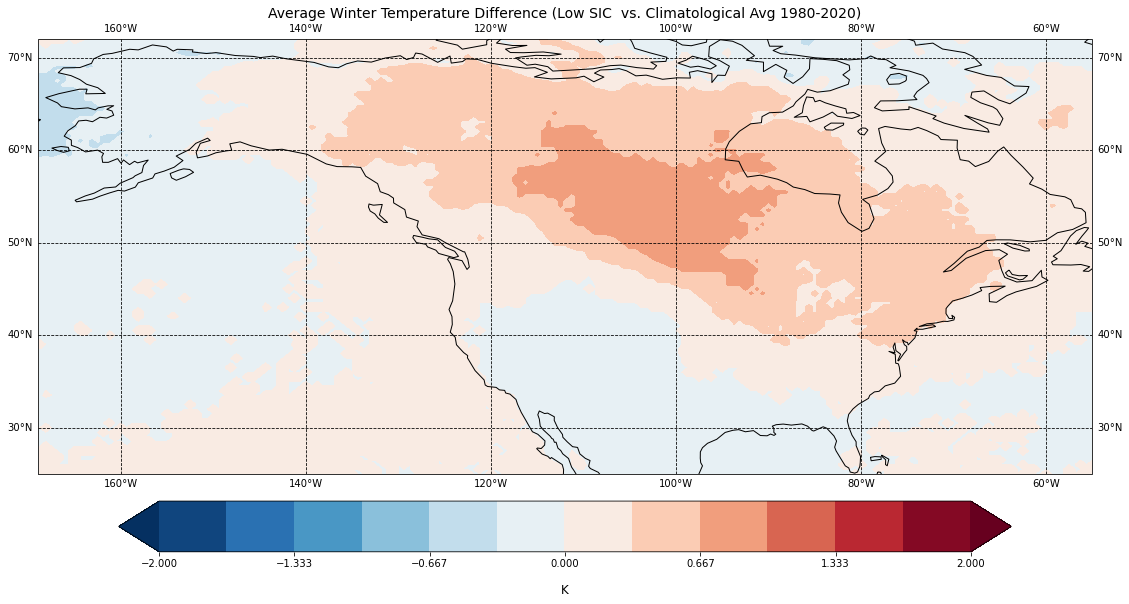

In [28]:
f = nc.Dataset('LowSICYears_Temp_detrended-data.nc', 'r')  #low sic
f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #cliamtology
lat= f.variables['lat']
lon=f.variables['lon']
t1=f.variables['T2M'][:,:]     ##low sic 
t2=f2.variables['T2M'][:,:]   ##climatology
temp=t1-t2


fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-2,2,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
plt.title('Average Winter Temperature Difference (Low SIC  vs. Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### Low SIC & El Nino - Climatology

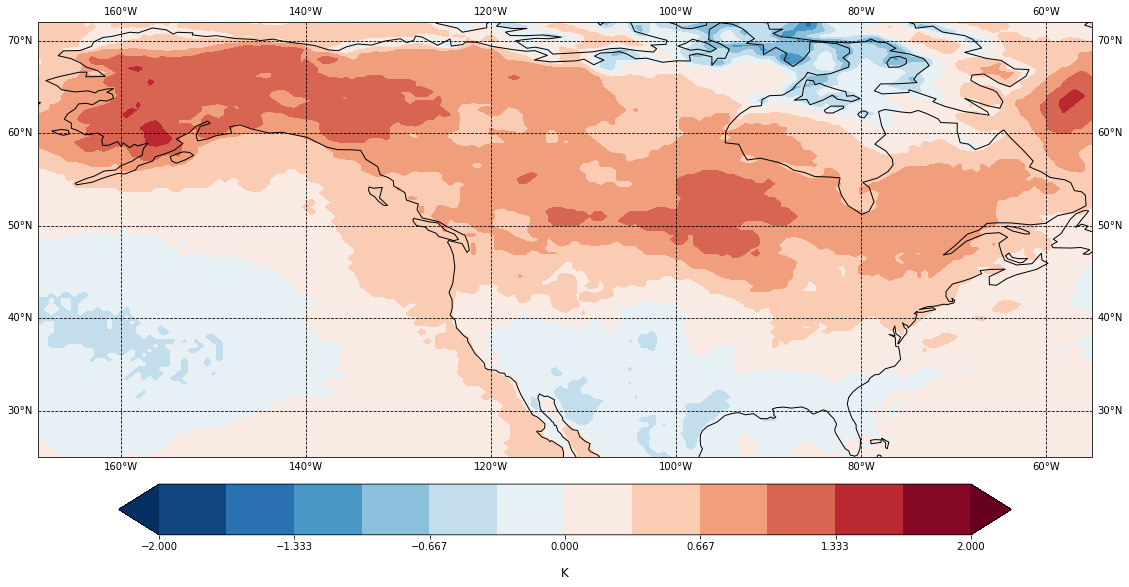

In [36]:
f = nc.Dataset('ElNino_LowSICYears_Temp_detrended-data.nc', 'r')  #low sic & el nino years
f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #climatology
lat= f.variables['lat']
lon=f.variables['lon']
t1=f.variables['T2M'][:,:]     ##low sic & el nino
t2=f2.variables['T2M'][:,:]   ##climatology
temp=t1-t2


fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-2,2,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC & El Nino vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())